# Logistic Regression Programming Exercise

#### Python Implementation

## Logistic regression

In [1]:
%matplotlib inline
import numpy as np #linear algebra
import matplotlib.pyplot as plt #Data visualization
from scipy import optimize #fminunc

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.
    Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams

In [2]:
# Load Data

data = np.loadtxt('ex2data1.txt', delimiter =',')
X = data[:, [0,1]] #exam Scores
y = data[:, 2]

### Visualizing the data

In [3]:
def plotData(X,y):
    pos = (y==1)
    neg = (y==0)
    plt.figure(figsize=(11,7))
    plt.scatter(X[pos, 0], X[pos, 1] ,label="Admitted", color='black', marker = '+')
    plt.scatter(X[neg, 0], X[neg, 1] ,label="Not admitted", color='yellow', marker = 'o')
    plt.ylabel('Exam 2 score')
    plt.xlabel('Exam 1 score')
    plt.grid()
    plt.legend()

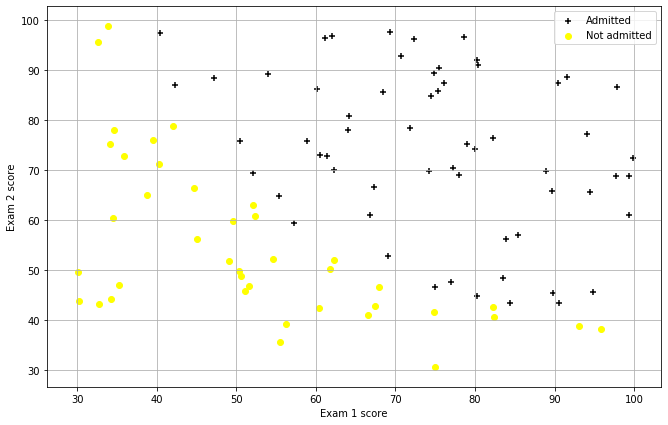

In [4]:
plotData(X,y)

### Sigmoid function

The logistic regression hypothesis is defined as: 
        $h_{\theta}(x) = g(\theta^Tx)$

Where function  is the sigmoid function. The sigmoid function is defined as: $g(z) = \frac{1}{1+e^{-z}}$

            


In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
sigmoid(0)

0.5

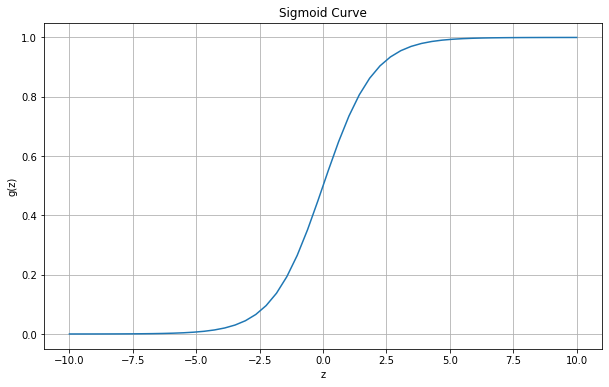

In [7]:
#plot to confirm
z = np.linspace(-10,10)
plt.figure(figsize=(10,6))
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('g(z)')
plt.grid()
plt.title('Sigmoid Curve')
plt.show()

### Cost Function and Gradient

The cost function in logistic regression is

$\mathrm{Cost}(h_\theta(x),y) = -y \log(h_\theta(x)) - (1 - y) \log(1-h_\theta(x))$

\begin{align}
J(\theta) & = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \\
& = - \dfrac{1}{m} [\sum_{i=1}^{m} y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1-h_\theta(x^{(i)}))] \\
\end{align}

and the gradient of the cost is a vector of the same length as Ө where the jth element (for j = 0,1,2,...n  is defined as follows:

$\frac{\partial}{\partial \theta_j} J(\theta) = \dfrac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$

So the iterative process is:

\begin{align} 
\text{repeat until convergence \{} \\
\theta_j & := \theta_j - \alpha \dfrac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \\ 
\text{\}}
\end{align}

In [8]:
def costFunction(X,y,theta):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (-1/m) * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    grad = (1/m) *(X.T.dot(h-y))
    return J, grad

In [9]:
X_train = np.insert(X,0,1, axis=1)
theta = np.array([0,0,0])
j, grad = costFunction(X_train,y,theta)

print('Cost at initial theta (zeros): %0.3f' %(j))
print(f'Gradient at initial theta (zeros):{np.round(grad,3)}' )

Cost at initial theta (zeros): 0.693
Gradient at initial theta (zeros):[ -0.1   -12.009 -11.263]


In [10]:
#further test
theta = np.array([-24, 0.2, 0.2])
j, grad = costFunction(X_train,y,theta)
print(j, grad, sep = ' ') #0.218 0.043 2.566 2.647

0.21833019382659785 [0.04290299 2.56623412 2.64679737]


### Learning parameters using fminunc

In [11]:
# Scipy optimize function is the equivalent to Octaves fmin unc
# You supply it with the cost and gradient functions; and the imitial paremeters of the function we want to minimize
def cost(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (-1/m) * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    return J


def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    grad = (1/m) *(X.T.dot(h-y))
    return grad

def fminunc(funcname, X,y,theta):
    res = optimize.minimize(fun=funcname, x0=theta, args=(X, y),
                        method='Newton-CG', jac=gradient)
    return res.fun, res.x

X_train = np.hstack((np.ones((X.shape[0], 1)), X))
initial_theta = np.array([0, 0, 0])
J, theta = fminunc(cost, X_train,y,initial_theta)
print(J)
print(theta)

0.20349770159179648
[-25.16120769   0.20623071   0.20147058]


### Plotting the decision boundary

It will be the equation of a straight line as $g\left ( z \right ) \geq 0.5$ when $\Theta ^{T}x \geq  0$ . 

That is:

$\Theta _{0} + \Theta _{1}x_{1} + \Theta_{2}x_{2} = 0$

Thus:

$x_{2} = -(\Theta _{0}+ \Theta _{1}x_{1}) / \Theta _{2}$

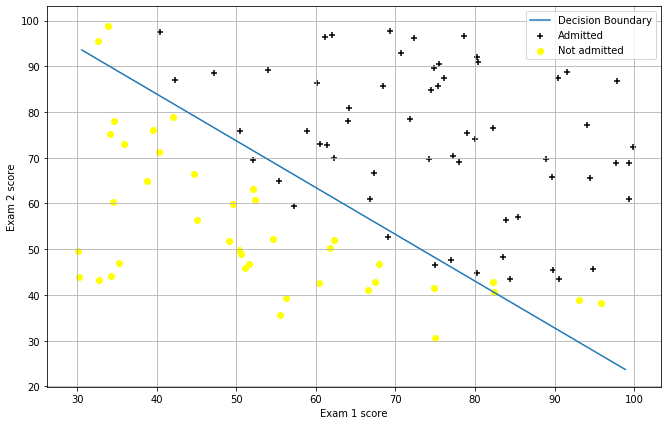

In [12]:
xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
ys = -(theta[0] + theta[1]*xs) * (1./theta[2])
plotData(X,y)
plt.plot(xs,ys,label='Decision Boundary')
plt.legend()

### Evaluating logistic regression

For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
you should expect to see an admission probability of 0.776.

In [13]:
h = lambda x: sigmoid(x.dot(theta))
scores = np.array([1,45,85])
h(scores)

0.7762896475170452

The predict function will produce '1' or '0' predictions given a dataset and a learned parameter vector .

In [14]:
def predict(X_train,theta):
    prob = sigmoid(X_train.dot(theta))
    return np.round(prob,0).astype(int)

In [15]:
y_pred = predict(X_train,theta)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [16]:
accuracy = np.mean(y_pred==y) * 100
print(f'The accuracy is {accuracy}%')

The accuracy is 89.0%


## Regularized Logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [17]:
#load Data
data = np.loadtxt('ex2data2.txt', delimiter =',')
X = data[:, [0,1]] #exam Scores
y = data[:, 2]

### Visualizing the data

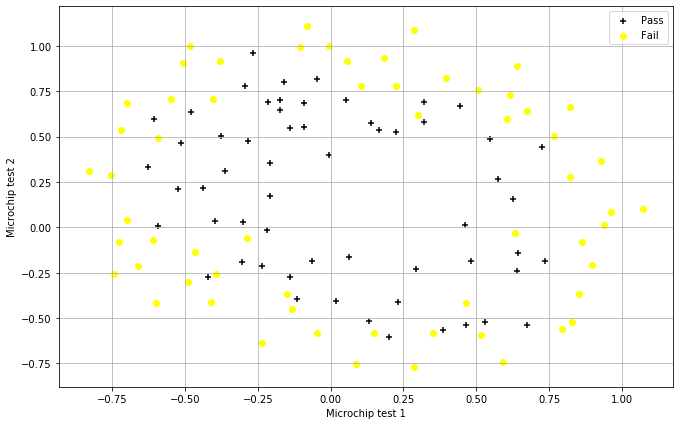

In [18]:
def plotData(X,y):
    pos = (y==1)
    neg = (y==0)
    plt.figure(figsize=(11,7))
    plt.scatter(X[pos, 0], X[pos, 1] ,label="Pass", color='black', marker = '+')
    plt.scatter(X[neg, 0], X[neg, 1] ,label="Fail", color='yellow', marker = 'o')
    plt.ylabel('Microchip test 2')
    plt.xlabel('Microchip test 1')
    plt.grid()
    plt.legend()
plotData(X,y)

that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### Feature mapping

One way to fit the data better is to create more features from each data point. we will map the features into all polynomial terms of $x_{1}$ and $x_{2}$  up to the sixth power.

In [19]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.hstack((out, (X1 ** (i - j) * X2 ** j)[:, np.newaxis]))
    return out

In [20]:
X_train = mapFeature(X[:,0], X[:,1])
X_train.shape

(118, 28)

### Cost function and gradient

The regularized cost function in logistic regression is
$$J(\theta) = \frac{1}{m}[\sum_{i=1}^m
    {-y^{(i)} \log{h_{\theta}}(x^{(i)}) - (1 - y^{(i)}) \log{(1 - h_{\theta}}(x^{(i)}))}] +
    \frac{\lambda}{2m}\sum_{j=1}^n{\theta_j^2}$$

The gradient of the cost function is a vector where the $jth$ element is defined as follows
    
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m{\left( h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}\qquad \mathrm{for}\;j=0,}$$

$$\frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m}\sum_{i=1}^m{\left( h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}} \right)+\frac{\lambda}{m}\theta_j\qquad \mathrm{for}\;j\geq1,$$

In [21]:
def costfunctionReg(theta,X,y,lam):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (-1/m)*(y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + (lam/ (2 * m)) * np.sum(theta[1:]**2) 
    
    grad = (1/m) * X.T.dot(h-y)
    grad[1:] += ((lam/m)* theta[1:])
    
    return J, grad

In [22]:
initial_theta = np.zeros(X_train.shape[1])
lam = 1
cost, grad = costfunctionReg(initial_theta,X_train,y,lam)
print(cost)  # 0.693
print(grad[:5])  # 0.0085 0.0188 0.0001 0.0503 0.0115

0.6931471805599453
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


### Learning Parameters using fminunc

In [23]:
def cost(theta, X, y, lam):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (-1/m)*(y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + (lam/ (2 * m)) * np.sum(theta[1:]**2) 
    return J


def gradient(theta, X, y, lam):
    m = y.size
    h = sigmoid(np.dot(X, theta))
    grad = (1/m) * X.T.dot(h-y)
    grad[1:] += ((lam/m)* theta[1:])
    return grad


lam = 1
theta = np.zeros(X_train.shape[1])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y, lam),
                        method='Newton-CG', jac=gradient)
print(res.fun)
print(res.x[:5])


0.5290027297129247
[ 1.27273776  0.62527149  1.18108574 -2.01995849 -0.91742314]


In [24]:
def plotDecisionBoundary(theta, X, y, lam):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = mapFeature(X_plot[:, 0], X_plot[:, 1])
    z = np.dot(X_plot, theta).reshape(xx.shape)
    plt.figure(figsize=(11,7))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="y = 1", color='black', marker = '+')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="y = 0", color='yellow', marker = 'o')
    cont = plt.contour(xx, yy, z, levels=[0])
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    myfmt = { 0:'Lambda = %d'%lam}
    plt.clabel(cont, inline=1, fontsize=8, fmt=myfmt)
    plt.grid()
    plt.legend()


Higher Values of Lambda(regularization parameter) will cause underfitting while the converse will result in overfitting.

Text(0.5, 1.0, 'Good Fit, accuracy 83.05%')

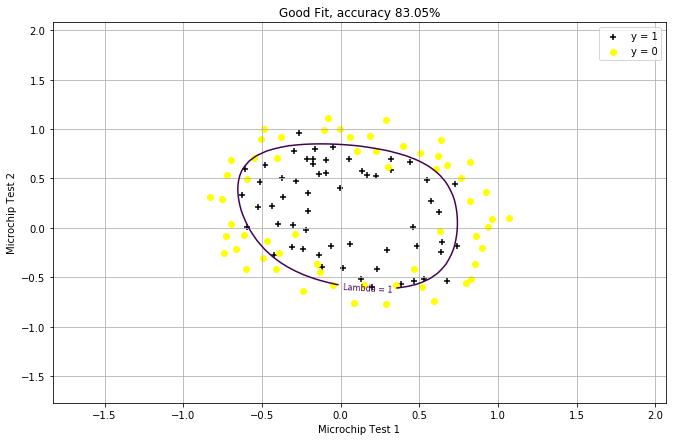

In [26]:
plotDecisionBoundary(res.x, X, y,1)
accuracy = np.mean(predict(X_train,res.x)==y)*100
plt.title(f'Good Fit, accuracy {np.round(accuracy,2)}%')

Text(0.5, 1.0, 'Overfitting, accuracy 88.14%')

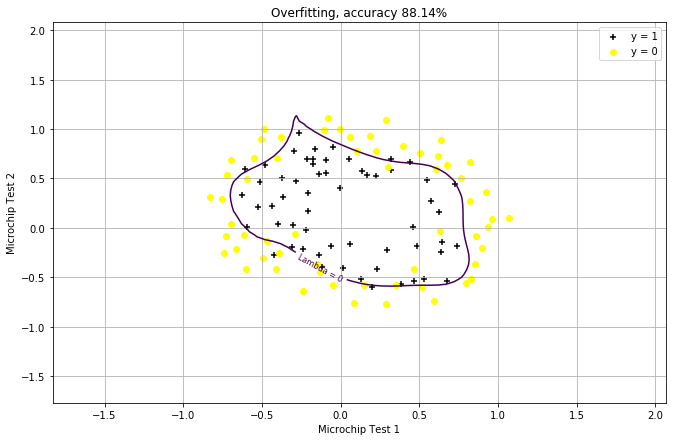

In [27]:
# overfitting
lam = 0
theta = np.zeros(X_train.shape[1])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y, lam),
                        method='Newton-CG', jac=gradient)
plotDecisionBoundary(res.x, X, y,lam)
accuracy = np.mean(predict(X_train,res.x)==y)*100
plt.title(f'Overfitting, accuracy {np.round(accuracy,2)}%')

Text(0.5, 1.0, 'Underfitting, accuracy 61.02%')

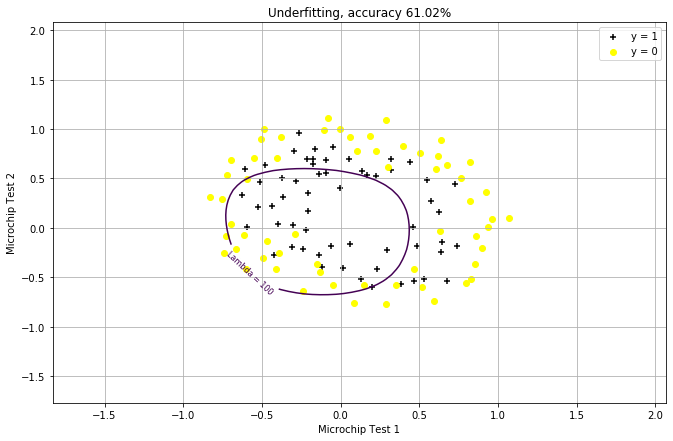

In [28]:
# underfitting
lam = 100
theta = np.zeros(X_train.shape[1])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y, lam),
                        method='Newton-CG', jac=gradient)
plotDecisionBoundary(res.x, X, y,lam)

accuracy = np.mean(predict(X_train,res.x)==y)*100
plt.title(f'Underfitting, accuracy {np.round(accuracy,2)}%')